<h2 style="color:black; font-weight:bold;">🚗 Used Car Price Prediction</h2>

This project aims to predict the selling price of used cars based on various features such as year, kilometers driven, fuel type, seller type, and more.

We perform Exploratory Data Analysis (EDA) to understand the distribution of the data, discover patterns, and visualize key relationships. Then, we preprocess the dataset by encoding categorical features and splitting the data for model training.

A Random Forest Regressor is trained to predict car prices based on historical data. The model is evaluated using metrics like R² Score and Mean Squared Error (MSE), along with a plot comparing actual vs predicted values.

This notebook is ideal for anyone learning about:

Data Cleaning and Preprocessing

EDA using Matplotlib and Seaborn

Machine Learning Regression models

Real-world use cases in the automobile industry

In [3]:
# 📦 Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [5]:
# 📂 Load the dataset
df = pd.read_csv("used_car_data.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti Swift,2014,350000,50000,Petrol,Individual,Manual,First Owner
1,Hyundai i20,2017,500000,30000,Diesel,Dealer,Manual,Second Owner
2,Honda City,2015,400000,40000,Petrol,Individual,Manual,First Owner
3,Toyota Innova,2012,600000,80000,Diesel,Dealer,Manual,Third Owner
4,Ford Figo,2016,300000,35000,Petrol,Individual,Manual,First Owner


## 🔍 Step 1: Exploratory Data Analysis (EDA)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           5 non-null      object
 1   year           5 non-null      int64 
 2   selling_price  5 non-null      int64 
 3   km_driven      5 non-null      int64 
 4   fuel           5 non-null      object
 5   seller_type    5 non-null      object
 6   transmission   5 non-null      object
 7   owner          5 non-null      object
dtypes: int64(3), object(5)
memory usage: 448.0+ bytes


In [10]:
df.describe()

,year,selling_price,km_driven
count,5.000000,5.000000,5.000000
mean,2014.800000,430000.000000,47000.000000
std,1.923538,120415.945788,19874.606914
min,2012.000000,300000.000000,30000.000000
25%,2014.000000,350000.000000,35000.000000
50%,2015.000000,400000.000000,40000.000000
75%,2016.000000,500000.000000,50000.000000
max,2017.000000,600000.000000,80000.000000


In [9]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

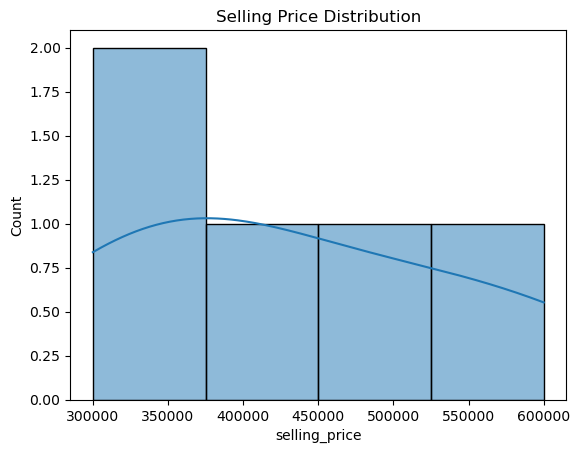

In [19]:
sns.histplot(df['selling_price'], kde=True)
plt.title('Selling Price Distribution')
plt.show()

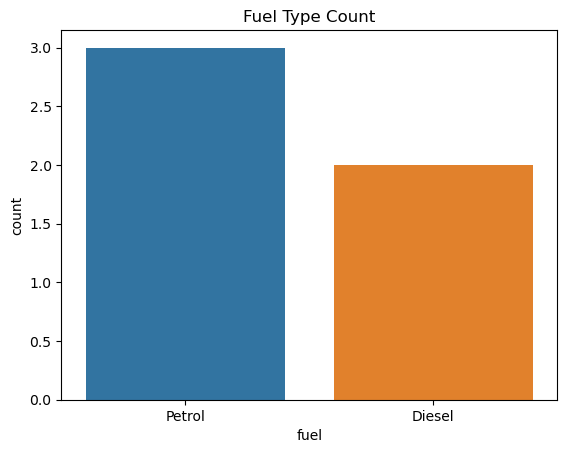

In [8]:
sns.countplot(x='fuel', data=df)
plt.title('Fuel Type Count')
plt.show()

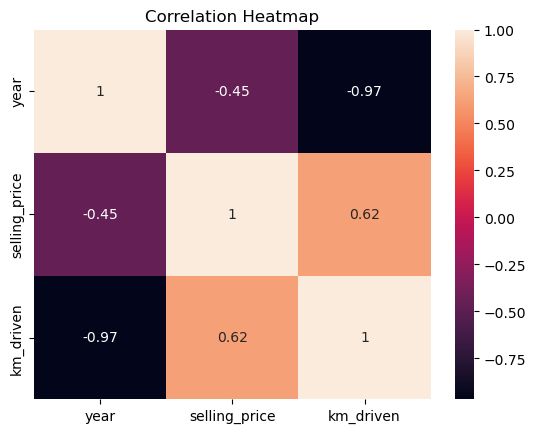

In [7]:
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

## 🧹 Step 2: Data Preprocessing

In [12]:
# Drop 'name' column
df = df.drop('name', axis=1)

# Convert categorical columns
df = pd.get_dummies(df, drop_first=True)
df.head()

,year,selling_price,km_driven,fuel_Petrol,seller_type_Individual,owner_Second Owner,owner_Third Owner
0,2014,350000,50000,1,1,0,0
1,2017,500000,30000,0,0,1,0
2,2015,400000,40000,1,1,0,0
3,2012,600000,80000,0,0,0,1
4,2016,300000,35000,1,1,0,0


## 🤖 Step 3: Model Building

In [13]:
X = df.drop('selling_price', axis=1)
y = df['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [17]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R² Score: {r2:.2f}")
print(f"MSE: {mse:.2f}")

R² Score: nan
MSE: 10302250000.00


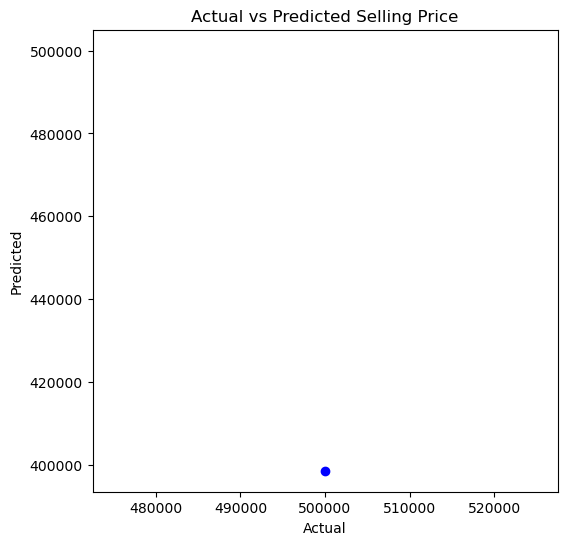

In [16]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, c='blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Selling Price')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()

## ✅ Conclusion
- Built a regression model to predict used car prices.
- Performed EDA, handled categorical data, and trained a Random Forest model.
- The R² score gives us an idea of prediction accuracy.